# Imports

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

# EDA

In [2]:
# Data Loading
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['quality'] = data.target  # Wine quality labels
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  quality  
0                          3.92   1065.0        0  
1                          3.40   1050.0        0  
2                          3.17   1185.0        0  
3                          3.45   1480.0        0  
4                          2.93    735.0        0

In [3]:
# Checking for null values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [4]:
# Data Inspection
print("Dataset Information:")
print(df.info())

print("\nDataset Summary:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null 

# Visulization

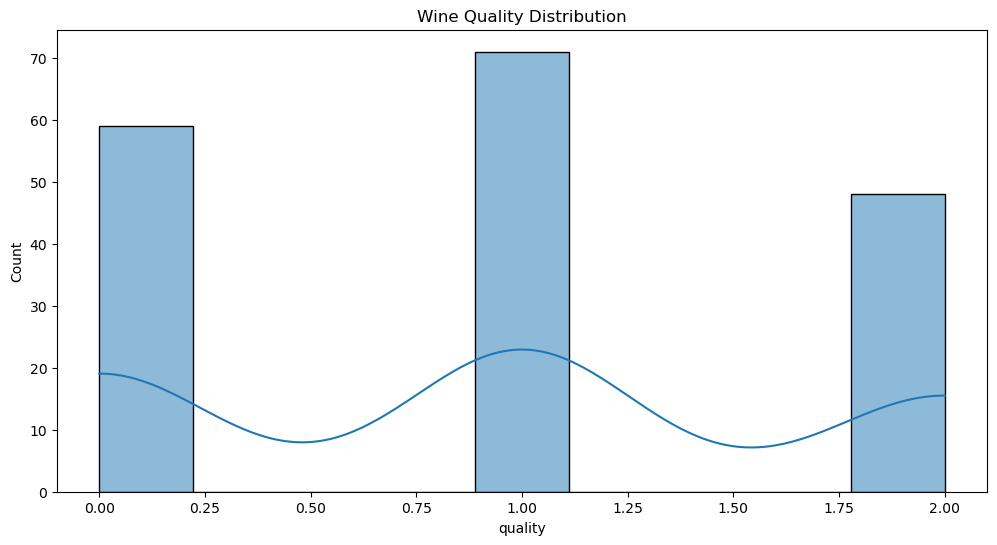

In [5]:
# Histplot
plt.figure(figsize=(12,6))
sns.histplot(df['quality'], kde=True)
plt.title("Wine Quality Distribution")
plt.show()


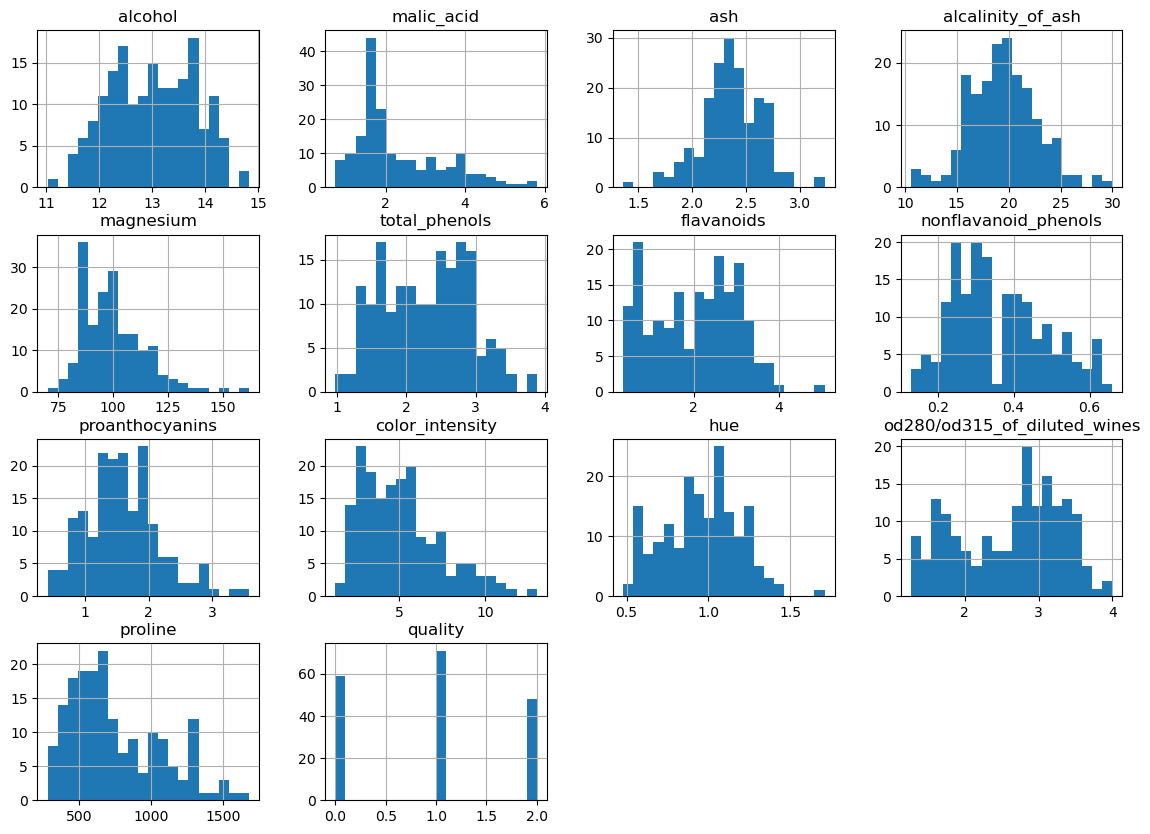

In [6]:
# Histograms for individual features
df.hist(bins=20, figsize=(14, 10))
plt.show()

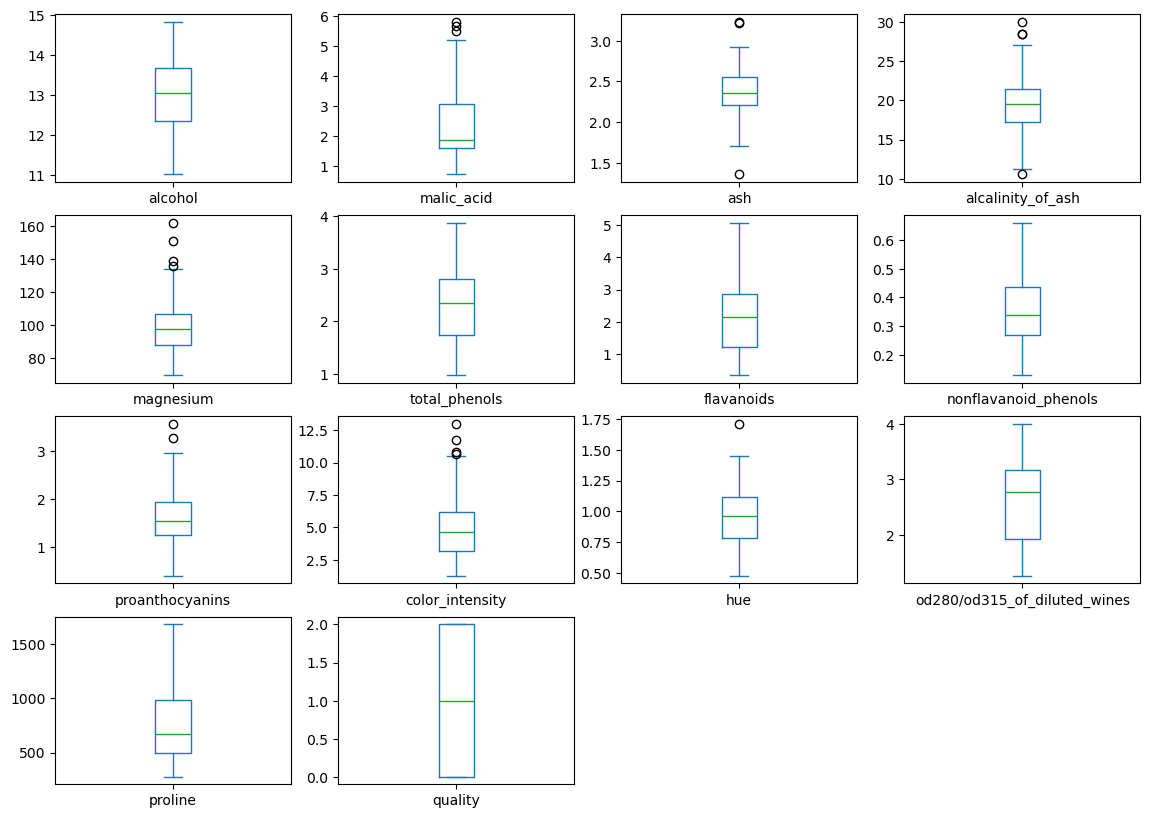

In [ ]:
# Box plots for individual features
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 10))
plt.show()

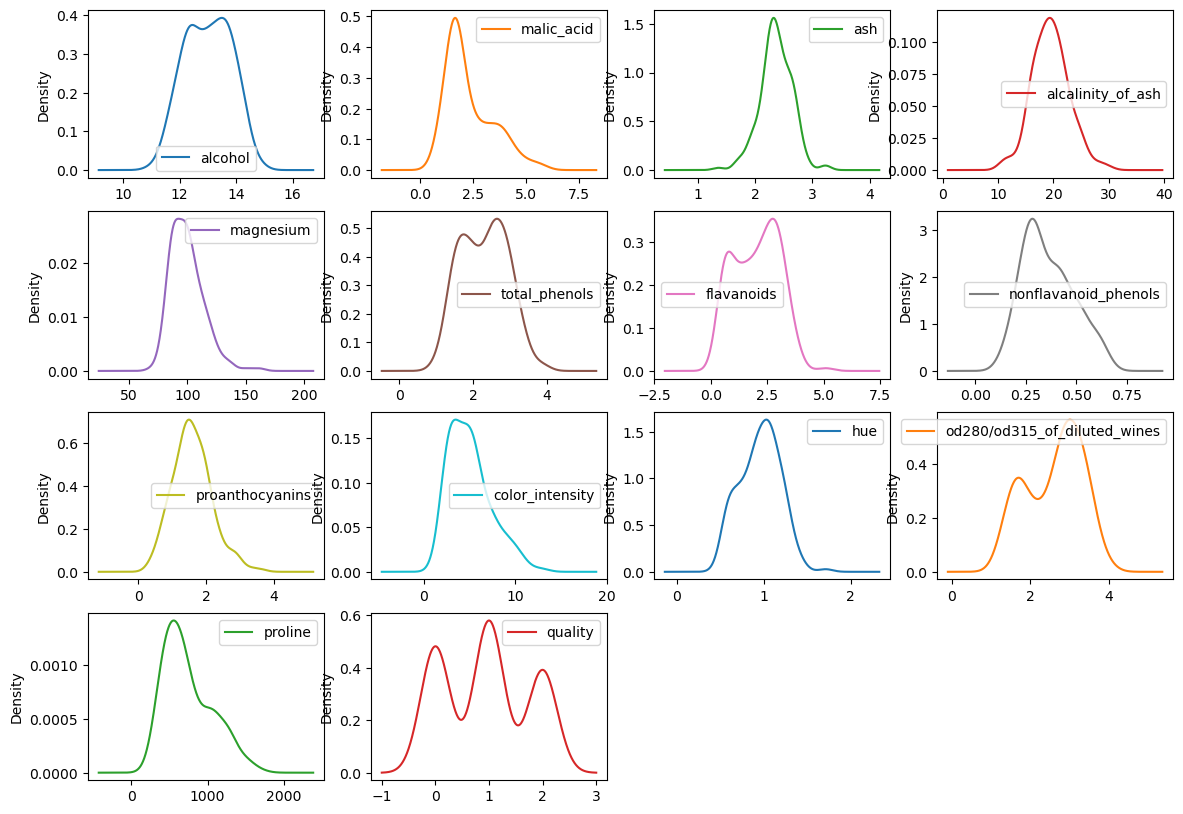

In [8]:
# Density plots for individual features
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 10))
plt.show()

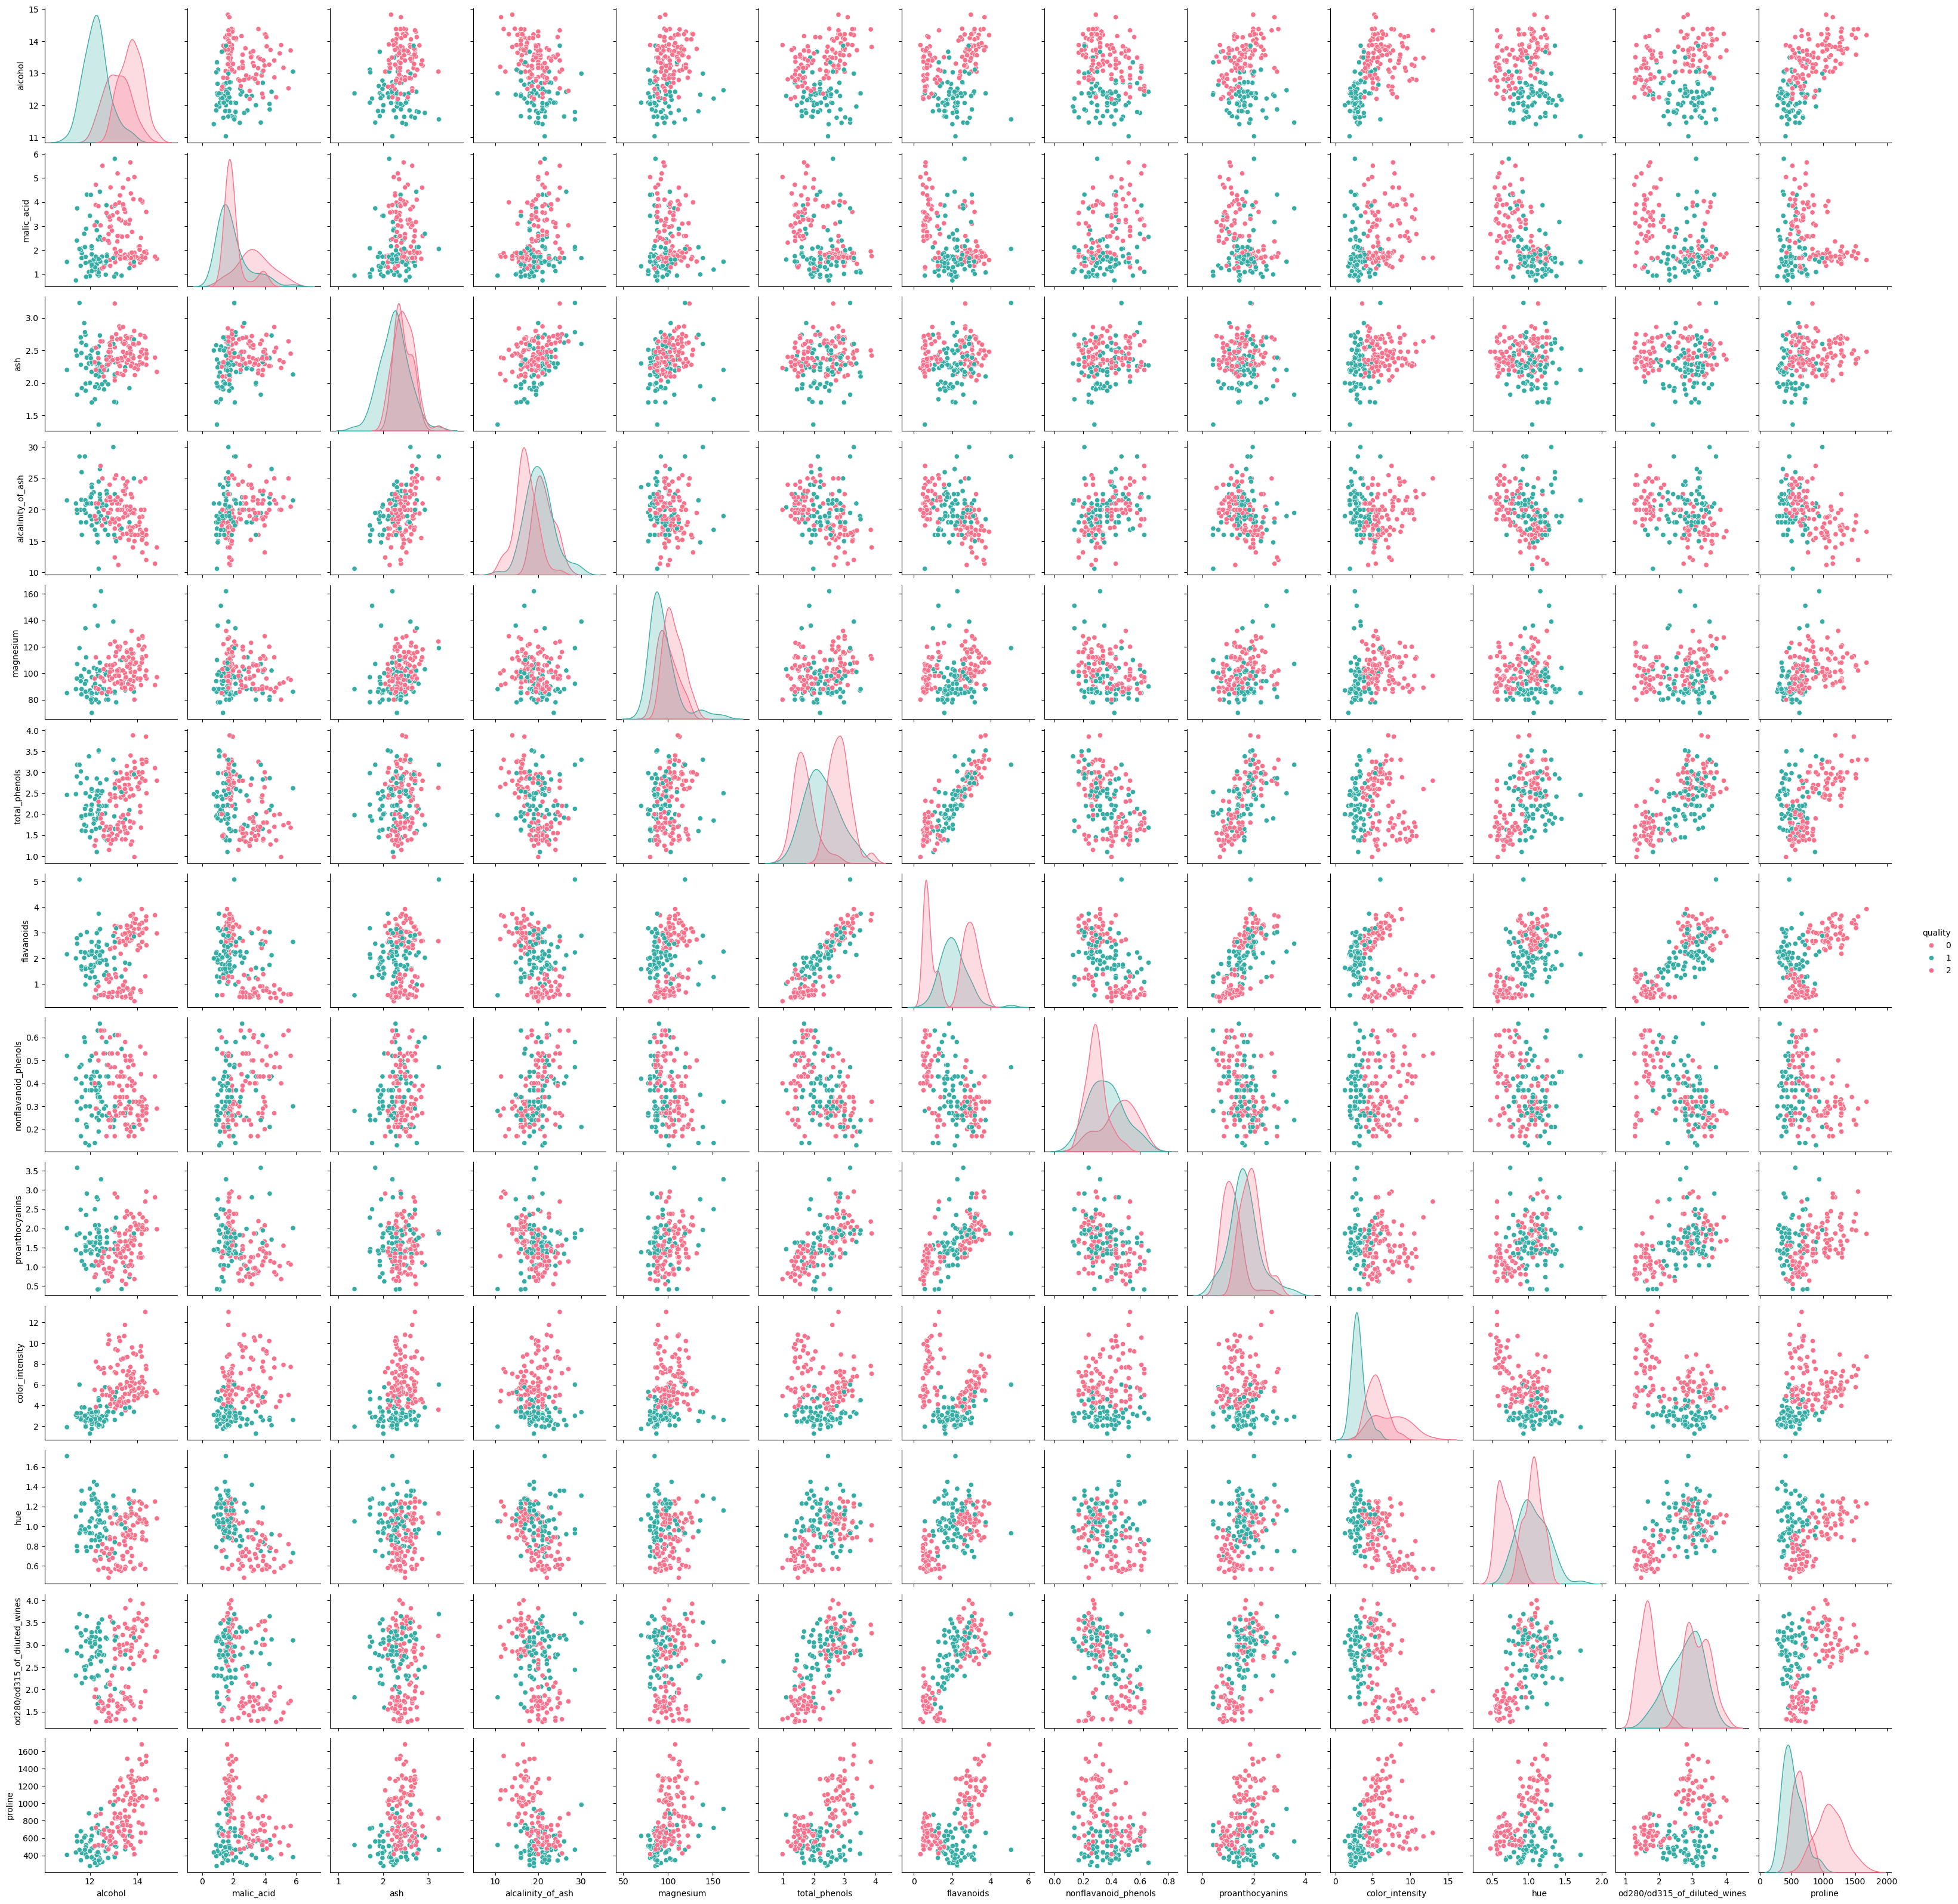

In [9]:
# Pair plot
sns.pairplot(df, hue="quality", palette="husl")
plt.show()

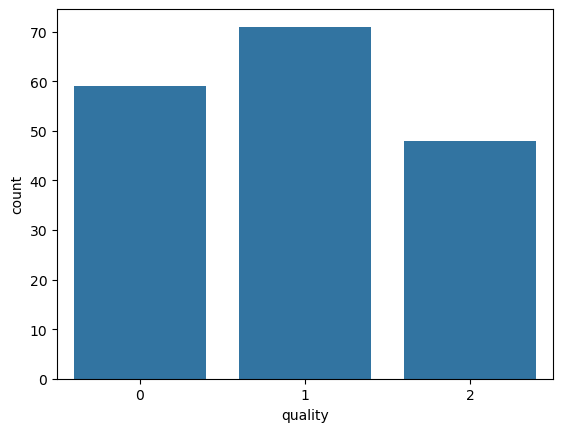

In [10]:

# Bar charts for quality labels distribution
sns.countplot(x='quality', data=df)
plt.show()

# Data Preparation

In [11]:
# Standardization
scaler = StandardScaler()
X = df.drop(columns=['quality'])
y = df['quality']
X_scaled = scaler.fit_transform(X)

In [12]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model building

In [13]:
# Initialize baseline models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Train the models on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  #'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')       
    f1 = f1_score(y_test, y_pred, average='weighted')               
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n" + "="*50 + "\n")

# Evaluate each model
evaluate_model(lr, X_test, y_test)
evaluate_model(dt, X_test, y_test)
evaluate_model(knn, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F1-Score: 0.9720
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


Model: DecisionTreeClassifier
Accuracy: 0.9444
Precision: 0.9514
Recall: 0.9444
F1-Score: 0.9450
Confusion Matrix:
[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


Model: KNeighborsClassifier
Accuracy: 0.9722
Precision: 0.9747
Recall: 0.9722
F1-Score: 0.9724
Confusion Matrix:
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]




# Hyperparamater tuning

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {'C': [0.1, 1.0, 10.0, 100.0]}

# Initialize Grid Search
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters for Logistic Regression: {grid_search_log_reg.best_params_}")
best_log_reg = grid_search_log_reg.best_estimator_

Best Parameters for Logistic Regression: {'C': 0.1}


In [16]:
# Define the parameter grid for Decision Tree
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Initialize Grid Search
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters for Decision Tree: {grid_search_decision_tree.best_params_}")
best_decision_tree = grid_search_decision_tree.best_estimator_

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}


In [17]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Initialize Grid Search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters for K-Nearest Neighbors: {grid_search_knn.best_params_}")
best_knn = grid_search_knn.best_estimator_

Best Parameters for K-Nearest Neighbors: {'n_neighbors': 9}


In [18]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  #'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')       
    f1 = f1_score(y_test, y_pred, average='weighted')               
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n" + "="*50 + "\n")

# Evaluate each model
evaluate_model(grid_search_log_reg, X_test, y_test)
evaluate_model(grid_search_decision_tree, X_test, y_test)
evaluate_model(grid_search_knn, X_test, y_test)

Model: GridSearchCV
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


Model: GridSearchCV
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F1-Score: 0.9721
Confusion Matrix:
[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]


Model: GridSearchCV
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]




NOTE : We can see that accuracy metrics have improved for all the models after performing hyperparamater tuning

# Feature Importance

Logisitic regression

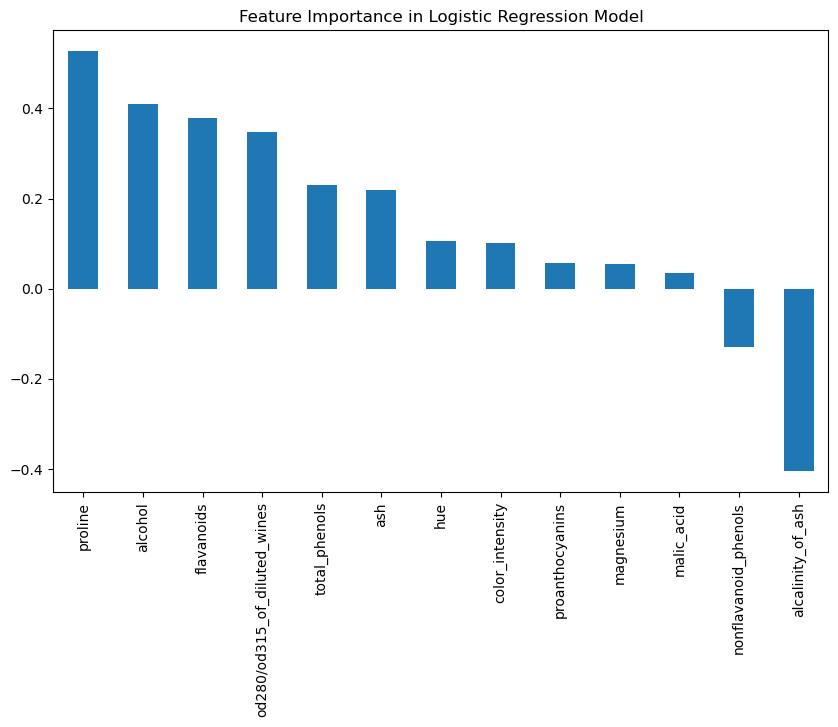

Most important features influencing wine quality:
proline                         0.526862
alcohol                         0.409690
flavanoids                      0.379790
od280/od315_of_diluted_wines    0.348401
total_phenols                   0.229747
dtype: float64


In [ ]:
# Feature Importance for Logistic Regression
feature_importance_lr = pd.Series(best_log_reg.coef_[0], index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_lr.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression Model")
plt.show()

print("Most important features influencing wine quality:")
print(feature_importance_lr.head(5))

Decision tree

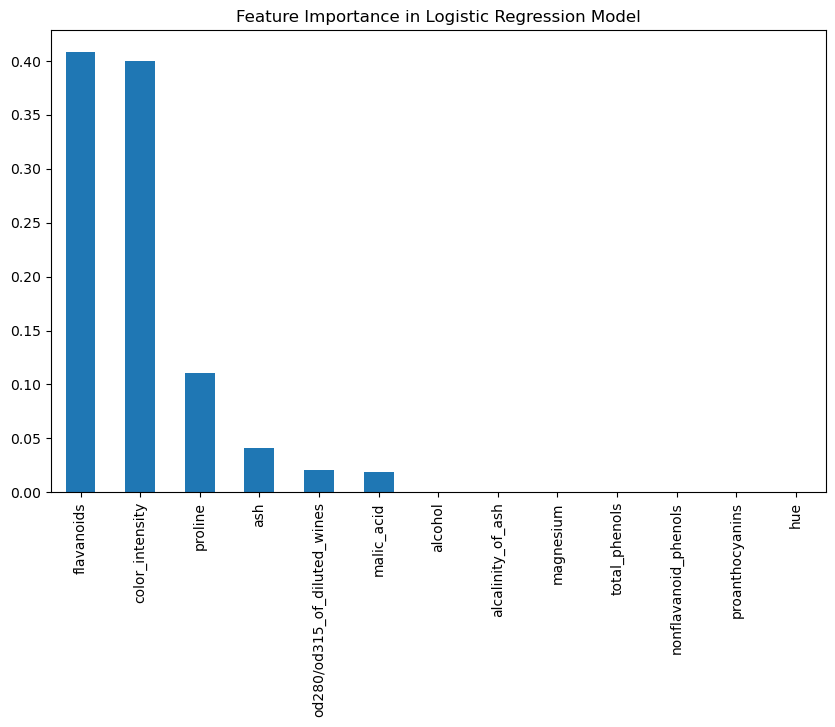

Most important features influencing wine quality:
flavanoids                      0.408073
color_intensity                 0.400189
proline                         0.110985
ash                             0.041029
od280/od315_of_diluted_wines    0.020986
dtype: float64


In [20]:
# Feature Importance for Decision tree
feature_importance_dt = pd.Series(best_decision_tree.feature_importances_, index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_dt.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression Model")
plt.show()

print("Most important features influencing wine quality:")
print(feature_importance_dt.head(5))

K-Nearest Neighbors

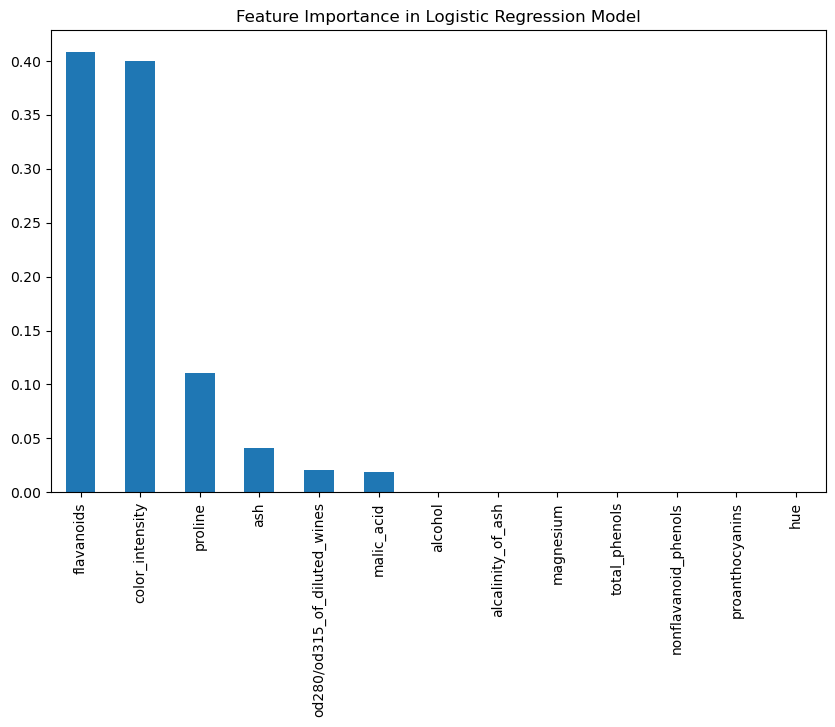

Most important features influencing wine quality:
flavanoids                      0.408073
color_intensity                 0.400189
proline                         0.110985
ash                             0.041029
od280/od315_of_diluted_wines    0.020986
dtype: float64


In [23]:
# Feature Importance for KNN
result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
feature_importance_knn = pd.Series(result.importances_mean, index=data.feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_dt.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression Model")
plt.show()

print("Most important features influencing wine quality:")
print(feature_importance_dt.head(5))